In [56]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [57]:
data = pd.read_excel('binary_metal_enery.xlsx',sheet_name='O_free_energy')

In [58]:
# data = data.dropna() # 删除缺失值 
data.head()

Unnamed: 0                      Structure          ψ      Nnear     χnear  \
0           0  AgIr_mp-1183229-bridge2O.vasp  20.502531   9.949874  2.060582   
1           1  AgIr_mp-1183229-bridge3O.vasp  21.230000   9.622603  2.106045   
2           2  AgIr_mp-1183229-bridge4O.vasp  20.502531   9.949874  2.060582   
3           3  AgIr_mp-1183229-bridge5O.vasp  19.800000  10.041046  2.048355   
4           4  AgIr_mp-1183229-hollow6O.vasp  19.800000  10.093519  2.041400   

        GCN  CN        Np    L-Bond      △G*O  
0  8.736842  18  5.477226  2.203189  1.396546  
1  7.631579  15  5.477226  2.414249  2.609922  
2  6.375000  10  5.477226  1.953361  0.937183  
3  9.181818  11  5.477226  1.948124  0.750141  
4  6.272727   7  5.477226  1.911698  0.904586

In [59]:
data = data.iloc[:,2:]
data.head()

ψ      Nnear     χnear       GCN  CN        Np    L-Bond      △G*O
0  20.502531   9.949874  2.060582  8.736842  18  5.477226  2.203189  1.396546
1  21.230000   9.622603  2.106045  7.631579  15  5.477226  2.414249  2.609922
2  20.502531   9.949874  2.060582  6.375000  10  5.477226  1.953361  0.937183
3  19.800000  10.041046  2.048355  9.181818  11  5.477226  1.948124  0.750141
4  19.800000  10.093519  2.041400  6.272727   7  5.477226  1.911698  0.904586

In [60]:
data.duplicated().sum()  # 若果是0表述没有重复数据

0

In [61]:
data.info()# 查看数据基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ψ       468 non-null    float64
 1   Nnear   468 non-null    float64
 2   χnear   468 non-null    float64
 3   GCN     468 non-null    float64
 4   CN      468 non-null    int64  
 5   Np      468 non-null    float64
 6   L-Bond  468 non-null    float64
 7   △G*O    468 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 29.4 KB


In [62]:
data = data.dropna() # 删除缺失值 

In [63]:
data.describe() # 查看数据基本信息

ψ       Nnear       χnear         GCN          CN          Np  \
count  468.000000  468.000000  468.000000  468.000000  468.000000  468.000000   
mean    18.404787    9.234438    1.978400    6.841354   11.495726    4.649521   
std      3.159439    0.925808    0.155257    0.969170    3.609704    0.545083   
min     10.850000    7.000000    1.550000    3.428571    4.000000    4.000000   
25%     16.590122    8.485281    1.871684    6.375000    8.000000    4.000000   
50%     18.800000    9.372200    2.016375    7.166667   12.000000    4.472136   
75%     20.900000   10.000000    2.074576    7.500000   15.000000    4.898979   
max     22.800000   11.000000    2.259731    9.181818   20.000000    6.000000   

           L-Bond        △G*O  
count  468.000000  468.000000  
mean     1.892231    0.992543  
std      0.147971    0.945291  
min      1.616642   -1.849996  
25%      1.794778    0.341394  
50%      1.889625    0.884552  
75%      1.988539    1.569506  
max      2.414249    4.068576

In [64]:
# 计算变量之间的pearson相关系数
CORR = data.corr(method='pearson')
print(CORR)

               ψ     Nnear     χnear       GCN        CN        Np    L-Bond  \
ψ       1.000000  0.528309  0.424742  0.181859  0.065441  0.442820  0.351864   
Nnear   0.528309  1.000000  0.503072  0.130326  0.051298  0.183201  0.112721   
χnear   0.424742  0.503072  1.000000  0.259735  0.121564  0.758897  0.274200   
GCN     0.181859  0.130326  0.259735  1.000000  0.624781  0.329576  0.459695   
CN      0.065441  0.051298  0.121564  0.624781  1.000000  0.180467  0.741249   
Np      0.442820  0.183201  0.758897  0.329576  0.180467  1.000000  0.420104   
L-Bond  0.351864  0.112721  0.274200  0.459695  0.741249  0.420104  1.000000   
△G*O    0.693865  0.524483  0.388905  0.129410 -0.194278  0.407284  0.060027   

            △G*O  
ψ       0.693865  
Nnear   0.524483  
χnear   0.388905  
GCN     0.129410  
CN     -0.194278  
Np      0.407284  
L-Bond  0.060027  
△G*O    1.000000  


<AxesSubplot:>

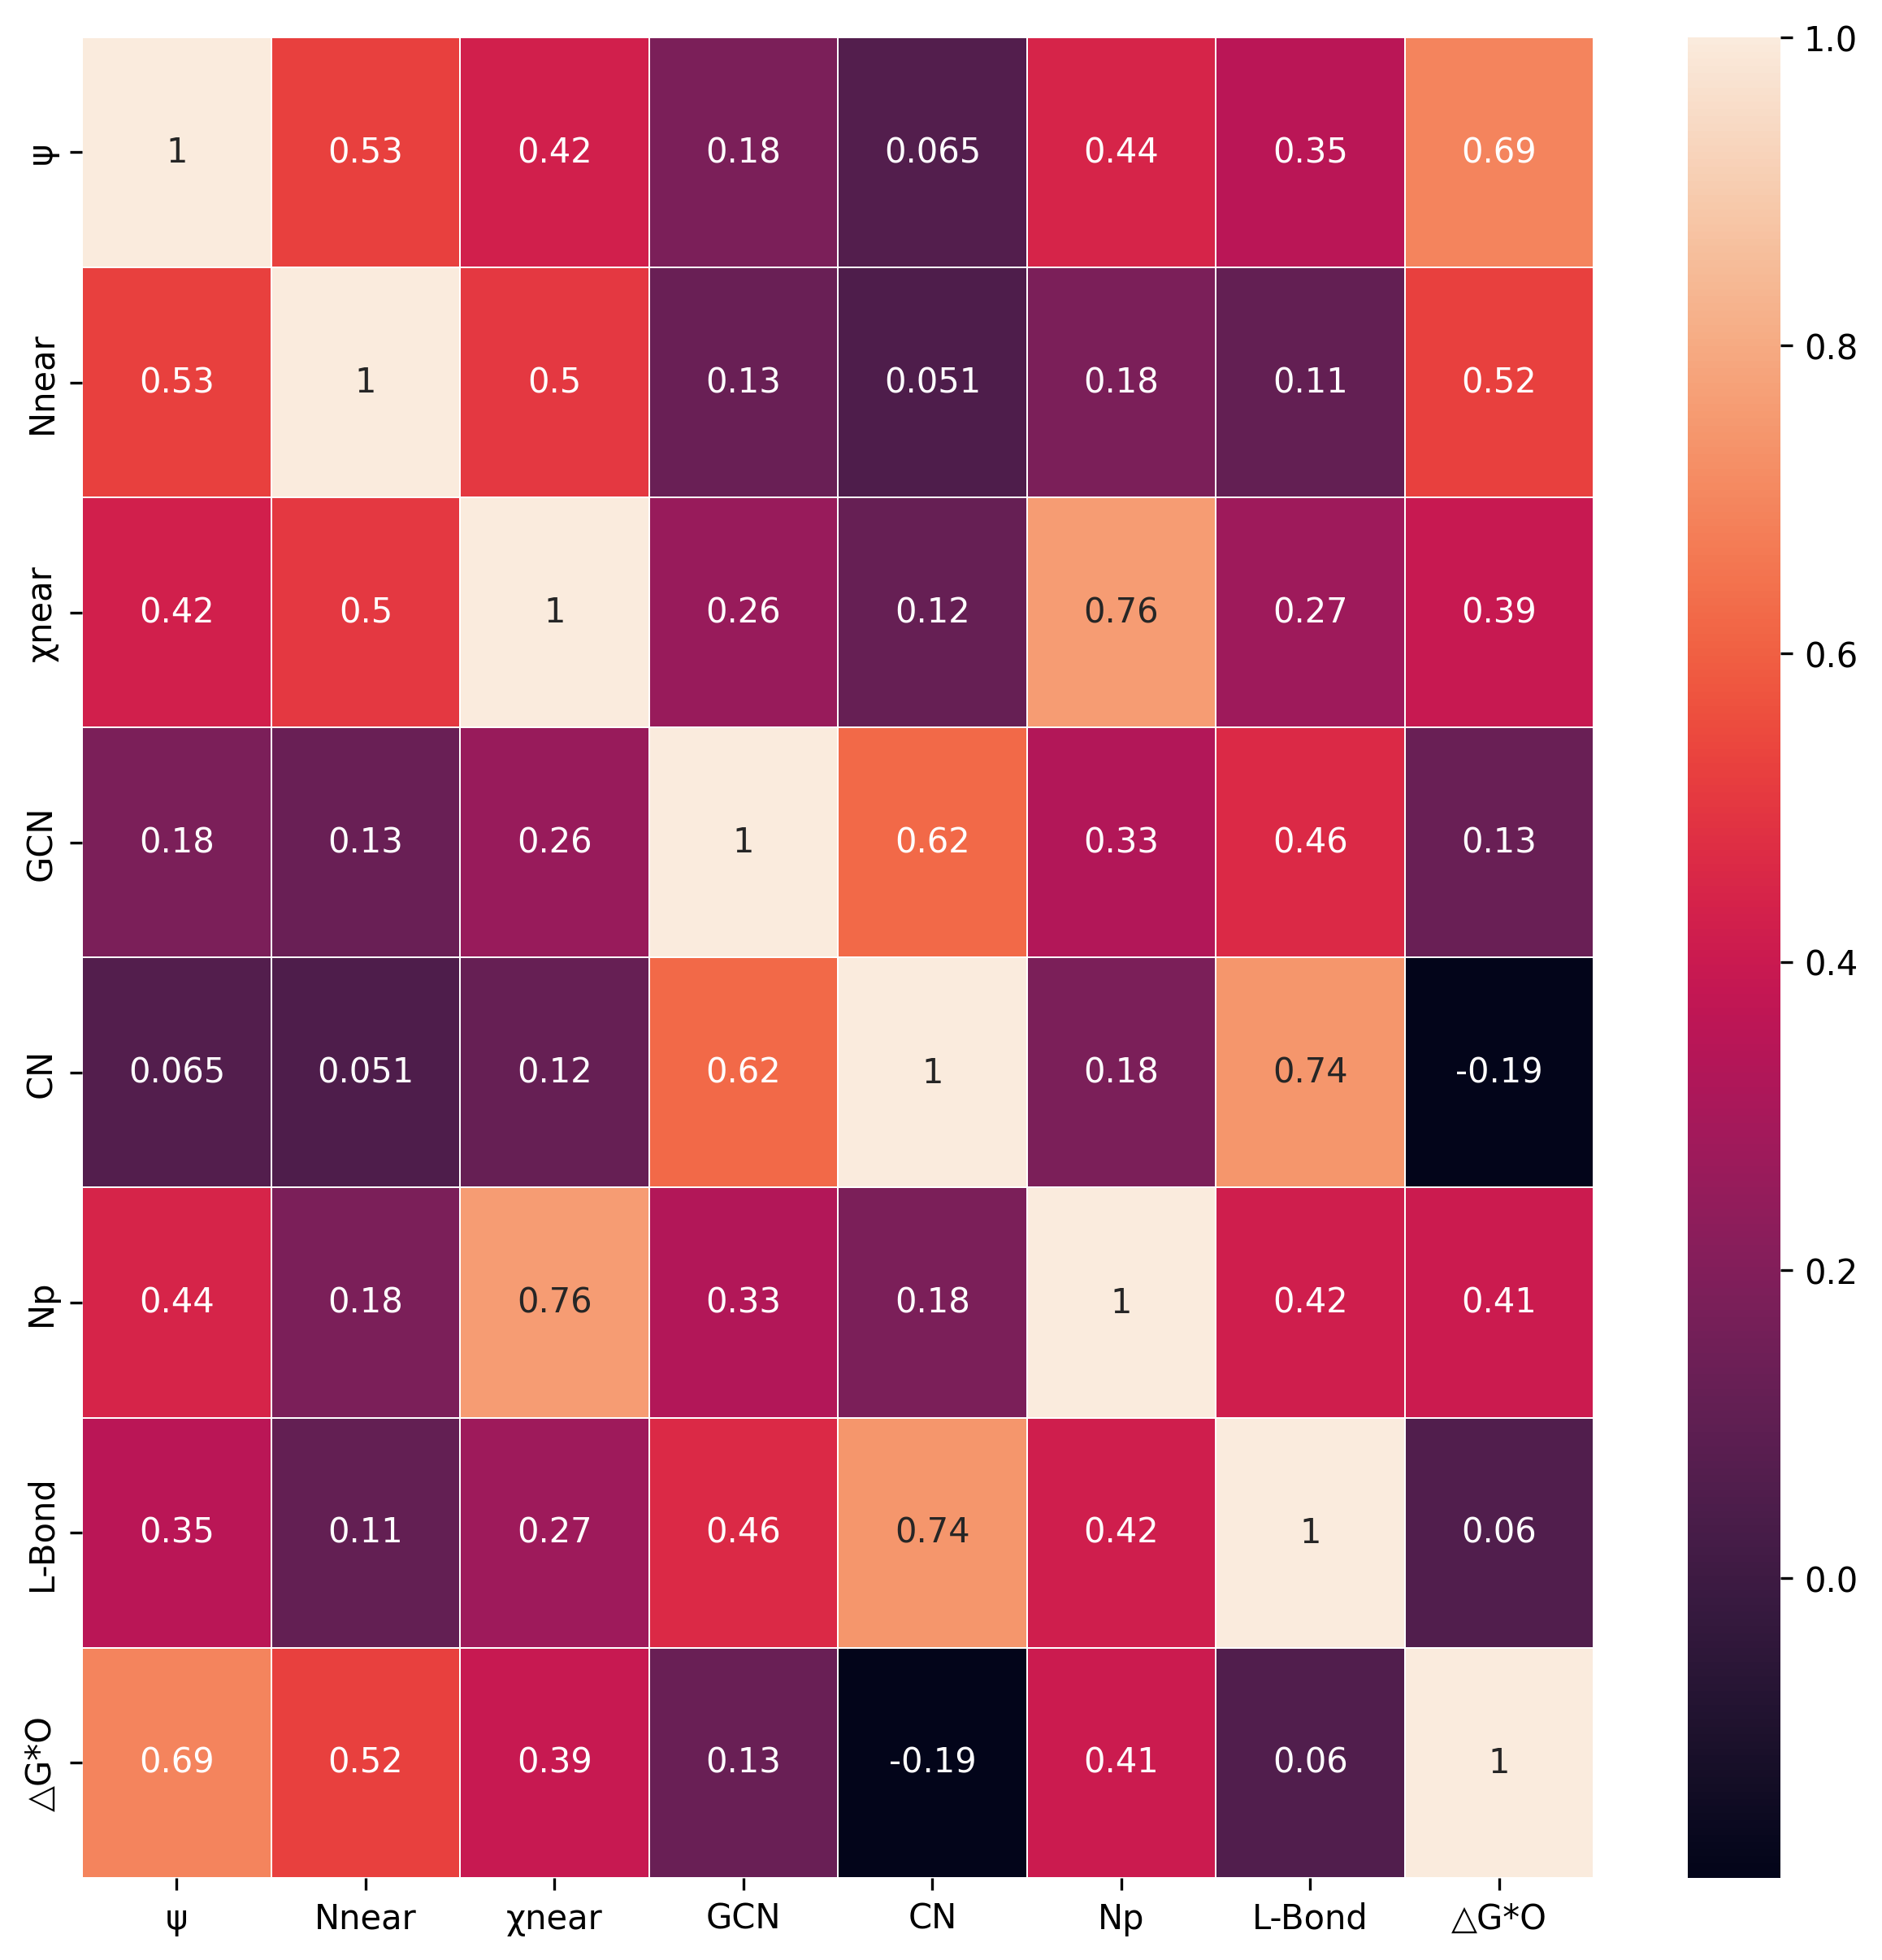

In [65]:
import  seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10),dpi=300)
sns.heatmap(CORR,annot=True,linewidths=0.1)

In [66]:
corrrlation_features = set()
CORR

ψ     Nnear     χnear       GCN        CN        Np    L-Bond  \
ψ       1.000000  0.528309  0.424742  0.181859  0.065441  0.442820  0.351864   
Nnear   0.528309  1.000000  0.503072  0.130326  0.051298  0.183201  0.112721   
χnear   0.424742  0.503072  1.000000  0.259735  0.121564  0.758897  0.274200   
GCN     0.181859  0.130326  0.259735  1.000000  0.624781  0.329576  0.459695   
CN      0.065441  0.051298  0.121564  0.624781  1.000000  0.180467  0.741249   
Np      0.442820  0.183201  0.758897  0.329576  0.180467  1.000000  0.420104   
L-Bond  0.351864  0.112721  0.274200  0.459695  0.741249  0.420104  1.000000   
△G*O    0.693865  0.524483  0.388905  0.129410 -0.194278  0.407284  0.060027   

            △G*O  
ψ       0.693865  
Nnear   0.524483  
χnear   0.388905  
GCN     0.129410  
CN     -0.194278  
Np      0.407284  
L-Bond  0.060027  
△G*O    1.000000

In [67]:
data.corr()

ψ     Nnear     χnear       GCN        CN        Np    L-Bond  \
ψ       1.000000  0.528309  0.424742  0.181859  0.065441  0.442820  0.351864   
Nnear   0.528309  1.000000  0.503072  0.130326  0.051298  0.183201  0.112721   
χnear   0.424742  0.503072  1.000000  0.259735  0.121564  0.758897  0.274200   
GCN     0.181859  0.130326  0.259735  1.000000  0.624781  0.329576  0.459695   
CN      0.065441  0.051298  0.121564  0.624781  1.000000  0.180467  0.741249   
Np      0.442820  0.183201  0.758897  0.329576  0.180467  1.000000  0.420104   
L-Bond  0.351864  0.112721  0.274200  0.459695  0.741249  0.420104  1.000000   
△G*O    0.693865  0.524483  0.388905  0.129410 -0.194278  0.407284  0.060027   

            △G*O  
ψ       0.693865  
Nnear   0.524483  
χnear   0.388905  
GCN     0.129410  
CN     -0.194278  
Np      0.407284  
L-Bond  0.060027  
△G*O    1.000000

In [68]:
from sklearn.neighbors import KNeighborsRegressor  # KNN回归
from sklearn.svm import SVR  # SVR
from sklearn.ensemble import RandomForestRegressor  #随机森林
from sklearn.neural_network import MLPRegressor   # 神经网络
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error # , neg_root_mean_squared_error, neg_mean_absolute_error
from sklearn.model_selection import GridSearchCV, cross_val_score
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"c:\windows\fonts\msyh.ttc", size = 20)

### Xgboost

In [70]:
# 使用XGBoost 回归测试
from xgboost import XGBRegressor as XGBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import KFold, cross_val_score as CVS
from sklearn.model_selection import KFold, cross_val_score as CVS, train_test_split as TTS
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold, cross_val_score
# import xgboost
import time

In [71]:
data

ψ      Nnear     χnear       GCN  CN        Np    L-Bond  \
0    20.502531   9.949874  2.060582  8.736842  18  5.477226  2.203189   
1    21.230000   9.622603  2.106045  7.631579  15  5.477226  2.414249   
2    20.502531   9.949874  2.060582  6.375000  10  5.477226  1.953361   
3    19.800000  10.041046  2.048355  9.181818  11  5.477226  1.948124   
4    19.800000  10.093519  2.041400  6.272727   7  5.477226  1.911698   
..         ...        ...       ...       ...  ..       ...       ...   
463  20.031976   8.885762  2.237291  7.166667  17  5.477226  2.187619   
464  17.600000   9.457416  2.259731  6.666667   8  5.477226  1.829502   
465  22.800000   8.458970  2.219733  6.666667   8  5.477226  1.887882   
466  22.800000   8.458970  2.219733  6.666667   8  5.477226  1.850298   
467  17.600000   9.457416  2.259731  6.666667   8  5.477226  1.730975   

         △G*O  
0    1.396546  
1    2.609922  
2    0.937183  
3    0.750141  
4    0.904586  
..        ...  
463  0.804281  
464  0.795729  
465  1.378513  
466  2.272936  
467  0.813829  

[468 rows x 8 columns]

In [72]:
data.describe()

ψ       Nnear       χnear         GCN          CN          Np  \
count  468.000000  468.000000  468.000000  468.000000  468.000000  468.000000   
mean    18.404787    9.234438    1.978400    6.841354   11.495726    4.649521   
std      3.159439    0.925808    0.155257    0.969170    3.609704    0.545083   
min     10.850000    7.000000    1.550000    3.428571    4.000000    4.000000   
25%     16.590122    8.485281    1.871684    6.375000    8.000000    4.000000   
50%     18.800000    9.372200    2.016375    7.166667   12.000000    4.472136   
75%     20.900000   10.000000    2.074576    7.500000   15.000000    4.898979   
max     22.800000   11.000000    2.259731    9.181818   20.000000    6.000000   

           L-Bond        △G*O  
count  468.000000  468.000000  
mean     1.892231    0.992543  
std      0.147971    0.945291  
min      1.616642   -1.849996  
25%      1.794778    0.341394  
50%      1.889625    0.884552  
75%      1.988539    1.569506  
max      2.414249    4.068576

<AxesSubplot:>

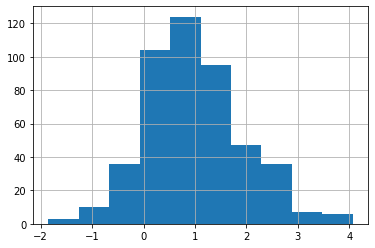

In [73]:
data['△G*O'].hist()
# plt.tight_layout()

In [74]:
X_O = data.iloc[:,0:-1]
y_O = data['△G*O']

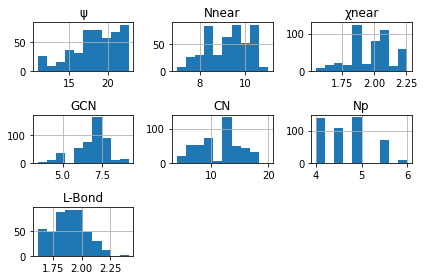

In [75]:
X_O.hist()
plt.tight_layout()

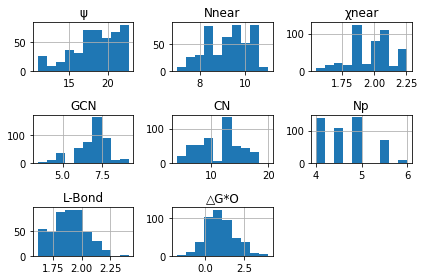

In [76]:
data.hist()
plt.tight_layout()
plt.savefig('data_analysis_O.tif')

In [77]:
x_train,x_test,y_train,y_test = train_test_split(X_O,y_O,test_size=0.2,random_state=60)

In [78]:
x_test

ψ      Nnear     χnear       GCN  CN        Np    L-Bond
15   22.000000  10.559734  2.041400  6.272727   7  5.000000  1.810219
375  15.449923   8.279290  1.827696  7.166667  17  4.472136  2.096819
441  18.800000  10.000000  2.172654  6.666667   8  4.898979  1.668586
456  22.263500  10.000000  2.244648  7.500000  16  5.477226  2.034587
312  12.603332   7.483315  1.684191  6.666667  12  4.000000  1.794982
..         ...        ...       ...       ...  ..       ...       ...
444  17.600000   9.087975  2.011010  6.272727   7  4.472136  1.844429
421  19.811290  10.000000  2.023088  6.954545  15  4.472136  1.931725
138  18.800000  10.543770  1.891085  7.500000   9  4.000000  1.671748
388  13.897330   8.555204  1.925788  7.500000  16  4.898979  1.957495
244  18.800000   8.458970  1.842374  6.666667   8  4.000000  1.677221

[94 rows x 7 columns]

# RF

In [79]:
from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor(random_state=2)
parameters= {
    'n_estimators':list(range(50,52,2)),
}
grid = GridSearchCV(estimator=RandomForestRegressor(random_state=2) ,param_grid=parameters,n_jobs= -1,cv=10)
RFR_model = grid.fit(x_train,y_train)

RFR_pred_train = RFR_model.predict(x_train)
mae = mean_absolute_error(y_train,RFR_pred_train)
print("train MAE = {:.3f}".format(mae))

mse = mean_squared_error(y_train,RFR_pred_train)
print("train MSE = {:.3f}".format(mse))

R2_train = r2_score(y_train,RFR_pred_train)
print("train R2 = {:.3f}".format(R2_train))

print("train RMSE = {:.3f}".format(np.sqrt(mse)))

print()
RFR_pred = RFR_model.predict(x_test)
mae = mean_absolute_error(y_test,RFR_pred)
print("test MAE = {:.3f}".format(mae))

mse = mean_squared_error(y_test,RFR_pred)
print("test MSE = {:.3f}".format(mse))

R2_test = r2_score(y_test,RFR_pred)
print("test R2 = {:.3f}".format(R2_test))

print("test RMSE = {:.3f}".format(np.sqrt(mse)))

train MAE = 0.123
train MSE = 0.028
train R2 = 0.966
train RMSE = 0.169

test MAE = 0.289
test MSE = 0.129
test R2 = 0.885
test RMSE = 0.359


# cross-validation-MAE

In [80]:
RFR_model = grid.best_estimator_
rf_mae = cross_val_score(RFR_model,x_train,y_train,cv=10,scoring="neg_mean_absolute_error")
print(np.abs(rf_mae))

[0.267962   0.29319902 0.31443541 0.52945201 0.28518297 0.32663649
 0.26483346 0.34846427 0.38191959 0.37800316]


In [81]:
print(np.mean(np.abs(rf_mae)))

0.339008838154481


# cross-validation-MSE

In [82]:
rf_mse = cross_val_score(RFR_model,x_train,y_train,cv=10,scoring="neg_mean_squared_error")
print(np.abs(rf_mse))

[0.12870512 0.15117083 0.17150533 0.49423202 0.14979162 0.21078444
 0.11420131 0.21489025 0.34432372 0.28871697]


In [83]:
print(np.mean(np.abs(rf_mse)))

0.22683216035506487


# cross-validation-RMSE

In [84]:
rf_rmse = cross_val_score(RFR_model,x_train,y_train,cv=10,scoring="neg_root_mean_squared_error")
print(np.abs(rf_rmse))

[0.35875496 0.38880693 0.41413202 0.70301638 0.38702922 0.45911267
 0.33793684 0.46356257 0.58679103 0.53732389]


In [85]:
print(np.mean(np.abs(rf_rmse)))

0.46364665022018337


# ETR

In [86]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()


parameters= {
    'min_samples_leaf':list(range(1,10,2)),
    'n_estimators':list(range(100,102,2)),
    'max_depth':list(range(1,10,2))
}

grid = GridSearchCV(estimator=ExtraTreesRegressor(random_state=2) ,param_grid=parameters,n_jobs= -1,cv=10)
etr_model = grid.fit(x_train,y_train)
best_parameters = grid.best_params_
print(best_parameters)


y_etr_pre_train = etr_model.predict(x_train)
y_etr_pred = etr_model.predict(x_test)


mae_train = mean_absolute_error(y_etr_pre_train,y_train)
mse_train = mean_squared_error(y_etr_pre_train,y_train)
R2_train = r2_score(y_train,y_etr_pre_train)
print('training R2 = {:.3f} V'.format(R2_train))
print('training mae = {:.3f} V'.format(mae_train))
print('training mse = {:.3f} V'.format(mse_train))
print('training RMSE = {:.3f} V'.format(np.sqrt(mse_train)))

print()

mae_test = mean_absolute_error(y_etr_pred,y_test)
mse_test = mean_squared_error(y_etr_pred,y_test)
R2_test = r2_score(y_test,y_etr_pred)
print('test R2 = {:.3f} V'.format(R2_test))
print('test mae = {:.3f} V'.format(mae_test))
print('test mse = {:.3f} V'.format(mse_test))
print('test RMSE = {:.3f} V'.format(np.sqrt(mse_test)))

{'max_depth': 9, 'min_samples_leaf': 1, 'n_estimators': 100}
training R2 = 0.973 V
training mae = 0.110 V
training mse = 0.022 V
training RMSE = 0.150 V

test R2 = 0.874 V
test mae = 0.296 V
test mse = 0.140 V
test RMSE = 0.374 V


# GBR

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
parameters= {
    'min_samples_leaf':list(range(1,10,2)),
    'n_estimators':list(range(100,102,2)),
    'max_depth':list(range(1,10,2))
}

grid = GridSearchCV(estimator=GradientBoostingRegressor(random_state=2) ,param_grid=parameters,n_jobs= -1,cv=10)
GBR_model = grid.fit(x_train,y_train)
best_parameters = grid.best_params_
print(best_parameters)


y_GBR_pre_train = GBR_model.predict(x_train)
y_GBR_pred = GBR_model.predict(x_test)

mae_train = mean_absolute_error(y_GBR_pre_train,y_train)
mse_train = mean_squared_error(y_GBR_pre_train,y_train)
R2_train = r2_score(y_train,y_GBR_pre_train)
print('training R2 = {:.3f} '.format(R2_train))
print('training mae = {:.3f} '.format(mae_train))
print('training mse = {:.3f} '.format(mse_train))
print('training RMSE = {:.3f} '.format(np.sqrt(mse_train)))

print()

mae_test = mean_absolute_error(y_GBR_pred,y_test)
mse_test = mean_squared_error(y_GBR_pred,y_test)
R2_test = r2_score(y_test,y_GBR_pred)
print('test R2 = {:.3f} '.format(R2_test))
print('test mae = {:.3f} '.format(mae_test))
print('test mse = {:.3f} '.format(mse_test))
print('test RMSE = {:.3f} '.format(np.sqrt(mse_test)))

{'max_depth': 3, 'min_samples_leaf': 9, 'n_estimators': 100}
training R2 = 0.901 
training mae = 0.203 
training mse = 0.082 
training RMSE = 0.287 

test R2 = 0.894 
test mae = 0.274 
test mse = 0.118 
test RMSE = 0.343 


# XGBR

In [88]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgbr = XGBRegressor(random_state = 0)

xgbr_grid = {
#    'min_samples_leaf':list(range(1,10,2)),
    'n_estimators':list(range(30,32,2)),
#    'max_depth':list(range(1,10,2))
}

xgbr_grid_cv = GridSearchCV(estimator = xgbr, cv = 10,
            param_grid = xgbr_grid, n_jobs = -1, scoring='neg_root_mean_squared_error')

model = xgbr_grid_cv.fit(x_train,y_train)

print(model.best_params_)

xgbr_preds = model.predict(x_train)

from sklearn.model_selection import cross_val_score

xgbr_optimized = xgbr_grid_cv.best_estimator_

#rmse_score = cross_val_score(xgbr_optimized, data, target_2, cv = 10, scoring='neg_root_mean_squared_error')
#mae_score = cross_val_score(xgbr_optimized, data, target_2, cv = 10, scoring='neg_mean_absolute_error')
#optimized_xgbr_rmse = np.abs(rmse_score).mean()
#optimized_xgbr_mae = np.abs(mae_score).mean()
xgbr_model = xgbr_grid_cv.best_estimator_
xgbr_preds_train = xgbr_model.predict(x_train)
xgbr_preds_1 = xgbr_model.predict(x_test)


mae_train = mean_absolute_error(xgbr_preds_train,y_train)
mse_train = mean_squared_error(y_train,xgbr_preds_train)
R2_train = r2_score(y_train,xgbr_preds_train)
print('training R2 = {:.3f} '.format(R2_train))
print('training mae = {:.3f} '.format(mae_train))
print('training mse = {:.3f} '.format(mse_train))
print('training RMSE = {:.3f} '.format(np.sqrt(mse_train)))

print()

mae_test = mean_absolute_error(xgbr_preds_1 ,y_test)
mse_test = mean_squared_error(xgbr_preds_1 ,y_test)
R2_test = r2_score(y_test,xgbr_preds_1)
print('test R2 = {:.3f} '.format(R2_test))
print('test mae = {:.3f} '.format(mae_test))
print('test mse = {:.3f} '.format(mse_test))
print('test RMSE = {:.3f} '.format(np.sqrt(mse_test)))

{'n_estimators': 30}
training R2 = 0.995 
training mae = 0.047 
training mse = 0.004 
training RMSE = 0.067 

test R2 = 0.913 
test mae = 0.242 
test mse = 0.097 
test RMSE = 0.311 


In [89]:
data_train = pd.DataFrame({"y_train":y_train,"y_train_pred":xgbr_preds_train})
data_train

y_train  y_train_pred
10   1.638542      1.688198
422  1.286317      1.375523
155  0.954922      0.977726
359  1.386166      1.352817
290  0.730369      0.731168
..        ...           ...
399  0.549279      0.451631
394  1.242316      1.238644
70   0.327473      0.392504
65   0.125366      0.202861
205  0.731663      0.667478

[374 rows x 2 columns]

In [90]:
data_train.to_csv("xgbr_train_pred_O.csv",index=False)

In [91]:
data_test = pd.DataFrame({"y_test":y_test,"y_test_pred":xgbr_preds_1})
data_test

y_test  y_test_pred
15   2.376156     2.280694
375  0.092627     0.049159
441  1.890697     1.633721
456  1.618249     1.616640
312 -1.013910    -0.870978
..        ...          ...
444  0.371466     0.332351
421  1.172317     0.991485
138  1.831609     1.616958
388  0.273381     0.261732
244  1.534506     1.396487

[94 rows x 2 columns]

In [92]:
data_test.to_csv("xgbr_test_pred_O.csv",index=False)

# Plot

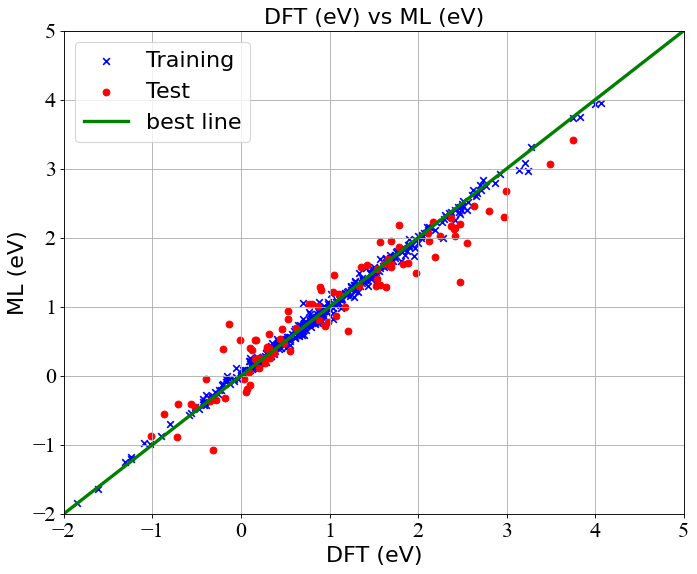

In [93]:
import matplotlib.pyplot as plt
# 1、创建画布
plt.figure(figsize=(10, 8), dpi=80)
plt.title('DFT (eV) vs ML (eV)', size = 20)
plt.xlabel('DFT (eV)', size = 20)
plt.ylabel('ML (eV)', size = 20)
plt.axis([-2, 5, -2, 5])
plt.xticks(fontproperties = 'Times New Roman', size = 20)
plt.yticks(fontproperties = 'Times New Roman', size = 20)
plt.grid(True)
# X = y_test
# y = y_predict

# 2、绘制图像
plt.scatter(y_train, xgbr_preds_train,  color="blue", marker = 'x', label = 'Training')
plt.scatter(y_test, xgbr_preds_1, color="red", label = 'Test')

plt.legend(loc=2,fontsize=20)    


# y_train_predict = estimator1.predict(y_train)
#     plt.plot(y_train, y_train_predict, color='black', linewidth=3, label="best line")

# 线能不能延长一些


import numpy as np
# 1、准备x，y数据
x = np.linspace(-2, 5, 1000)
y =  x 

plt.plot(x, y, color='green', linewidth=3, label="best line")
plt.legend(loc=2,fontsize=20)   

# Predict

In [94]:
data_validation = pd.read_excel('validation_set_predict.xlsx',sheet_name='O_free_energy_predict')

In [95]:
data_validation

Unnamed: 0                      Structure          ψ      Nnear     χnear  \
0           1      CuAu_mp-522-bridge3O.vasp  21.658076  11.000000  2.196816   
1           2      CuAu_mp-522-hollow5O.vasp  20.247887  11.000000  1.900000   
2           3    MnAu_mp-12675-bridge2O.vasp  19.734603   8.774964  1.984187   
3           4  PdAu_mp-1219920-bridge3O.vasp  20.660353  10.000000  2.200000   
4           5  ZnAg_mp-1187974-bridge5O.vasp  22.605864  11.489125  1.784517   
5           6  ZnAg_mp-1215437-hollow6O.vasp  22.807784  11.000000  1.930000   
6           7   ZnNi_mp-567903-bridge3O.vasp  20.373843  12.000000  1.650000   
7           8      ZnPt_mp-894-bridge3O.vasp  24.345013  10.954451  1.939588   

         GCN        CN         Np    L-Bond       G_O  
0  47.864392  6.666667  11.000000  4.898979  1.915815  
1  29.000000  6.666667  11.000000  4.898979  1.650691  
2  44.440972  7.166667   8.774964  4.898979  1.250350  
3  46.000000  7.333333  10.488088  5.477226  1.883247  
4  37.549967  6.375000  11.489125  4.472136  1.643500  
5  47.000000  6.666667  11.489125  4.472136  2.107637  
6  30.000000  2.666667  10.954451  4.000000  1.719844  
7  48.373546  7.166667  10.954451  4.898979  1.509588

In [96]:
x_data_validation = data_validation.iloc[:,2:-1]

y_data_validation = data_validation.iloc[:,-1]

In [97]:
y_validation_predict = xgbr_model.predict(x_data_validation)

In [98]:
pd.DataFrame({"y_validation":y_data_validation,"y_validation_pred":y_validation_predict})

y_validation  y_validation_pred
0      1.915815           1.971399
1      1.650691           1.938113
2      1.250350           1.145582
3      1.883247           1.922610
4      1.643500           1.921770
5      2.107637           1.870733
6      1.719844           2.030661
7      1.509588           1.870733

In [99]:
data_validation_table = pd.DataFrame({"y_validation":y_data_validation,"y_validation_pred":y_validation_predict})
data_validation_table

y_validation  y_validation_pred
0      1.915815           1.971399
1      1.650691           1.938113
2      1.250350           1.145582
3      1.883247           1.922610
4      1.643500           1.921770
5      2.107637           1.870733
6      1.719844           2.030661
7      1.509588           1.870733

In [100]:
data_validation_table.to_csv("xgbr_validation_pred_O.csv",index=False)

# export data

In [101]:
X_O = data.iloc[:,0:-1]
y_O = data['△G*O']

In [102]:
y_origin_data_predict = xgbr_model.predict(X_O)

In [103]:
data_origin_data_table = pd.DataFrame({"y_origin":y_O,"y_origin_pred":y_origin_data_predict})
data_origin_data_table

y_origin  y_origin_pred
0    1.396546       1.388858
1    2.609922       2.611542
2    0.937183       1.006718
3    0.750141       0.756900
4    0.904586       0.892326
..        ...            ...
463  0.804281       0.801700
464  0.795729       0.774340
465  1.378513       1.380953
466  2.272936       2.230577
467  0.813829       0.826962

[468 rows x 2 columns]

In [104]:
data_origin_data_table.to_csv("xgbr_origin_pred_O.csv",index=False)

# SHAP

In [105]:
import shap

In [106]:
shap_values = shap.TreeExplainer(xgbr_model).shap_values(x_test)

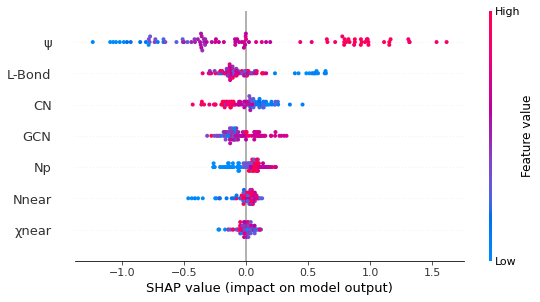

In [107]:
shap.summary_plot(shap_values,x_test,show=False)
plt.savefig('shap_feature_value_O')

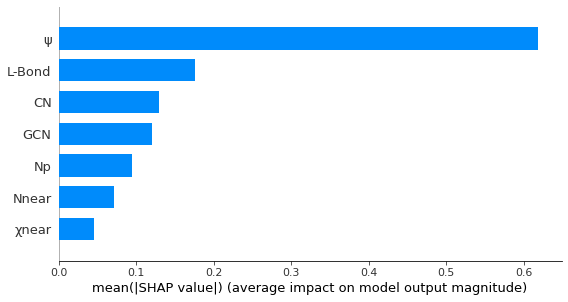

In [108]:
shap.summary_plot(shap_values,x_test,plot_type='bar',show=False)
plt.savefig('features_importance_O')

In [109]:
def main(random_states,R2_trains, R2_tests):
    x_train,x_test,y_train,y_test = train_test_split(X_O,y_O,test_size=0.2,random_state=random_states)
    from sklearn.ensemble import RandomForestRegressor

    RFR = RandomForestRegressor(random_state=2)
    parameters= {
        'n_estimators':list(range(80,82,2)),
    }
    grid = GridSearchCV(estimator=RandomForestRegressor(random_state=2) ,param_grid=parameters,n_jobs= -1,cv=10)
    RFR_model = grid.fit(x_train,y_train)

    RFR_pred_train = RFR_model.predict(x_train)
    mae = mean_absolute_error(y_train,RFR_pred_train)
    print("train MAE = {:.4f}".format(mae))

    mse = mean_squared_error(y_train,RFR_pred_train)
    print("train MSE = {:.4f}".format(mse))

    R2_train = r2_score(y_train,RFR_pred_train)
    print("train R2 = {:.4f}".format(R2_train))

    print("train RMSE = {:.4f}".format(np.sqrt(mse)))

    RFR_pred = RFR_model.predict(x_test)
    mae = mean_absolute_error(y_test,RFR_pred)
    print("test MAE = {:.4f}".format(mae))

    mse = mean_squared_error(y_test,RFR_pred)
    print("test MSE = {:.4f}".format(mse))

    R2_test = r2_score(y_test,RFR_pred)
    print("test R2 = {:.4f}".format(R2_test))

    print("test RMSE = {:.4f}".format(np.sqrt(mse)))

    R2_trains.append(R2_train)
    R2_tests.append(R2_test)

In [110]:
R2_tests = []
R2_trains = []

for i in range(0,100):
    print("当random_values是: ",i)
    random_values = i
    main(random_values,R2_trains, R2_tests)

当random_values是:  0
train MAE = 0.1169
train MSE = 0.0276
train R2 = 0.9674
train RMSE = 0.1662
test MAE = 0.3171
test MSE = 0.1854
test R2 = 0.8252
test RMSE = 0.4306
当random_values是:  1
train MAE = 0.1139
train MSE = 0.0227
train R2 = 0.9747
train RMSE = 0.1505
test MAE = 0.2666
test MSE = 0.1459
test R2 = 0.8333
test RMSE = 0.3819
当random_values是:  2
train MAE = 0.1212
train MSE = 0.0294
train R2 = 0.9654
train RMSE = 0.1716
test MAE = 0.3153
test MSE = 0.1759
test R2 = 0.8294
test RMSE = 0.4194
当random_values是:  3
train MAE = 0.1159
train MSE = 0.0240
train R2 = 0.9724
train RMSE = 0.1548
test MAE = 0.3523
test MSE = 0.2186
test R2 = 0.7771
test RMSE = 0.4675
当random_values是:  4
train MAE = 0.1124
train MSE = 0.0232
train R2 = 0.9732
train RMSE = 0.1522
test MAE = 0.3457
test MSE = 0.2583
test R2 = 0.7396
test RMSE = 0.5082
当random_values是:  5
train MAE = 0.1136
train MSE = 0.0236
train R2 = 0.9746
train RMSE = 0.1535
test MAE = 0.3549
test MSE = 0.2373
test R2 = 0.6787
test RMSE =

train MAE = 0.1210
train MSE = 0.0266
train R2 = 0.9693
train RMSE = 0.1631
test MAE = 0.3128
test MSE = 0.1704
test R2 = 0.8274
test RMSE = 0.4127
当random_values是:  50
train MAE = 0.1090
train MSE = 0.0206
train R2 = 0.9747
train RMSE = 0.1436
test MAE = 0.3804
test MSE = 0.2672
test R2 = 0.7712
test RMSE = 0.5169
当random_values是:  51
train MAE = 0.1167
train MSE = 0.0246
train R2 = 0.9709
train RMSE = 0.1570
test MAE = 0.3255
test MSE = 0.1981
test R2 = 0.8147
test RMSE = 0.4451
当random_values是:  52
train MAE = 0.1229
train MSE = 0.0281
train R2 = 0.9692
train RMSE = 0.1677
test MAE = 0.2449
test MSE = 0.1151
test R2 = 0.8561
test RMSE = 0.3393
当random_values是:  53
train MAE = 0.1102
train MSE = 0.0236
train R2 = 0.9730
train RMSE = 0.1535
test MAE = 0.3067
test MSE = 0.1815
test R2 = 0.8127
test RMSE = 0.4260
当random_values是:  54
train MAE = 0.1189
train MSE = 0.0276
train R2 = 0.9711
train RMSE = 0.1661
test MAE = 0.3015
test MSE = 0.1536
test R2 = 0.7614
test RMSE = 0.3919
当random

train MAE = 0.1196
train MSE = 0.0276
train R2 = 0.9670
train RMSE = 0.1662
test MAE = 0.3485
test MSE = 0.2100
test R2 = 0.8095
test RMSE = 0.4583
当random_values是:  99
train MAE = 0.1139
train MSE = 0.0240
train R2 = 0.9726
train RMSE = 0.1548
test MAE = 0.3112
test MSE = 0.1708
test R2 = 0.8139
test RMSE = 0.4133


In [111]:
data_R2_f = pd.DataFrame({"R2_train":R2_trains,"R2_test":R2_tests})
data_R2_f

R2_train   R2_test
0   0.967431  0.825250
1   0.974698  0.833319
2   0.965447  0.829387
3   0.972419  0.777054
4   0.973245  0.739643
..       ...       ...
95  0.965940  0.821976
96  0.975835  0.642851
97  0.969055  0.814926
98  0.967017  0.809451
99  0.972636  0.813925

[100 rows x 2 columns]

In [112]:
data_R2_f = data_R2_f.sort_values(by="R2_test",ascending=False)
data_R2_f

R2_train   R2_test
60  0.966224  0.885834
11  0.965134  0.885345
78  0.968039  0.879968
52  0.969208  0.856104
83  0.968746  0.849702
..       ...       ...
45  0.973218  0.710057
26  0.974874  0.709933
82  0.972539  0.709829
5   0.974639  0.678749
96  0.975835  0.642851

[100 rows x 2 columns]